# Introduction
## Part 1: Cheminformatics

The programming projects in this repository provide an introduction to calculating various thermochemical and kinetic properties of molecules and reactions from first principles using quantum chemistry.

Here, you will be introduced to some of the cheminformatics routines available to you.
By "cheminformatics", we mean various ways of representing a molecule and its structure.

### `protochem`

[`protochem`](../../src/protochem/) is a helper module that goes along with these
programming projects and provides some convenience functions for interacting
with various cheminformatics libraries.

You will be modifying and adding to `protochem` as you go along, so it is worth
getting familiar with the basic structure.
It is organized as a series of submodules, including:
 - [geom](../../src/protochem/geom.py): Functions for working with molecular structures or "geometries"
 - [smiles](../../src/protochem/smiles.py): Functions for working with [SMILES strings](https://en.wikipedia.org/wiki/Simplified_Molecular_Input_Line_Entry_System#Examples)
 - [rd.mol](../../src/protochem/rd/mol.py): Functions for working with the `Mol` objects of the cheminformatics library [RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html)

Each of these submodules consists of functions acting on the given data type,
along with a series of "constructor" functions for creating the data type from
another.
The constructor functions are all named `from_<other data type name>`.

The following example shows how you might use these submodules.
It converts a SMILES string to a `Geometry` data structure and extracts various
information for it.

In [4]:
from protochem import smiles, geom

smi = "C[CH2]"  # SMILES formula for propyl radical

# Generate a geometry for the SMILES formula
geo = smiles.geometry(smi)

# Get information from the geometry data structure
natms = geom.count(geo)
syms = geom.symbols(geo)
xyzs = geom.coordinates(geo)
char = geom.charge(geo)
spin = geom.spin(geo)

print("Atom count:", natms)
print("Symbols:", syms)
print("Coordinates (in Angstrom):", xyzs)
print("Charge:", char)
print("Spin:", spin)

Atom count: 7
Symbols: ['C', 'C', 'H', 'H', 'H', 'H', 'H']
Coordinates (in Angstrom): [[-6.00950828e-01  3.82978646e-02 -1.02326548e-04]
 [ 8.69633983e-01 -2.66500520e-02  2.84545648e-01]
 [-9.17809116e-01 -6.42961938e-01 -8.28637018e-01]
 [-1.16583727e+00 -2.88588153e-01  9.07920027e-01]
 [-9.53912704e-01  1.06378199e+00 -2.63699195e-01]
 [ 1.44384888e+00  8.41407023e-01 -7.16841359e-02]
 [ 1.32502706e+00 -9.85286739e-01 -2.83430004e-02]]
Charge: 0
Spin: 1


In a Jupyter notebook, you can also display the molecular geometry as follows.

In [5]:
geom.display(geo)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### protochem.geom.Geometry

Initially, we will be primarily focused on the `Geometry` data structure of the `geom` submodule, which has the following attributes:
 - `symbols`: The list of atomic symbols
 - `coordinates`: A $n\times3$ numpy array of coordinates in (units: [Bohr radii](https://en.wikipedia.org/wiki/Bohr_radius))
 - `charge`: The total charge of the molecule
 - `spin`: The total spin of the electrons in the molecule ($2S$ where $S$ is the total spin quantum number)

You can print the data structure to see the values of these attributes.

In [7]:
print(geo)

symbols=['C', 'C', 'H', 'H', 'H', 'H', 'H'] coordinates=array([[-1.13563248e+00,  7.23724752e-02, -1.93369150e-04],
       [ 1.64337006e+00, -5.03612995e-02,  5.37713345e-01],
       [-1.73440786e+00, -1.21502197e+00, -1.56589702e+00],
       [-2.20311315e+00, -5.45352572e-01,  1.71572019e+00],
       [-1.80263376e+00,  2.01025663e+00, -4.98319257e-01],
       [ 2.72847894e+00,  1.59002883e+00, -1.35463384e-01],
       [ 2.50393825e+00, -1.86192209e+00, -5.35605082e-02]]) charge=0 spin=1


While these values can be accessed directly as `geo.symbols`, `geo.coordinates`,
etc., it is recommended to use the functions above to access these values
instead.
These functions can be used to process the values for convenience, such as converting the units of the coordinates.

In [11]:
xyzs_bohr = geom.coordinates(geo)  # equivalent to geo.coordinates
xyzs_angs = geom.coordinates(geo, unit="angstrom")

print("Coordinates in Bohr:")
print(xyzs_bohr)  

print("Coordinates in Angstroms:")
print(xyzs_angs)

Coordinates in Bohr:
[[-1.13563248e+00  7.23724752e-02 -1.93369150e-04]
 [ 1.64337006e+00 -5.03612995e-02  5.37713345e-01]
 [-1.73440786e+00 -1.21502197e+00 -1.56589702e+00]
 [-2.20311315e+00 -5.45352572e-01  1.71572019e+00]
 [-1.80263376e+00  2.01025663e+00 -4.98319257e-01]
 [ 2.72847894e+00  1.59002883e+00 -1.35463384e-01]
 [ 2.50393825e+00 -1.86192209e+00 -5.35605082e-02]]
Coordinates in Angstroms:
[[-6.00950828e-01  3.82978646e-02 -1.02326548e-04]
 [ 8.69633983e-01 -2.66500520e-02  2.84545648e-01]
 [-9.17809116e-01 -6.42961938e-01 -8.28637018e-01]
 [-1.16583727e+00 -2.88588153e-01  9.07920027e-01]
 [-9.53912704e-01  1.06378199e+00 -2.63699195e-01]
 [ 1.44384888e+00  8.41407023e-01 -7.16841359e-02]
 [ 1.32502706e+00 -9.85286739e-01 -2.83430004e-02]]


### Exercise: Open the Hood

To understand what `protochem` is doing under the hood, let us implement following `protochem` functionality through direct calls to the respective libraries it uses.

In [ ]:
from protochem import smiles, geom

smi = "C[CH2]"  # SMILES formula for ethyl radical
geo = smiles.geometry(smi)  # Convert to geometry
geom.display(geo)  # Display geometry

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Exercise:
1. Use [RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html) to read the SMILES string into a `Mol` object.
2. Add molecular coordinates to the `Mol` object.
3. Determine the atom count, atomic symbols, coordinates, charge, and spin from the `Mol` object.
4. Convert the coordinates from Angstroms to Bohr using [Pint](https://pint.readthedocs.io/en/stable/getting/tutorial.html).
5. Visualize the 3D structure using [3Dmol](https://3dmol.org/).

The documentation for these packages can be difficult to navigate, so feel free
to reference the solution below.
(Of course, you will only benefit from this if you make sure you understand what each step is doing.)

### Solution

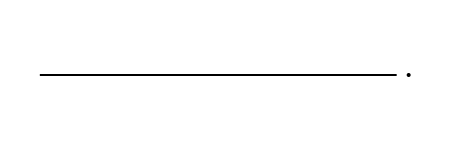

In [12]:
# 1. Use RDKit to read the SMILES string into a `Mol` object
from rdkit import Chem

smi = "C[CH2]"  # SMILES formula for ethyl radical
mol = Chem.MolFromSmiles(smi)  # Interpret SMILES formula
mol # RDKit molecule objects are display-able

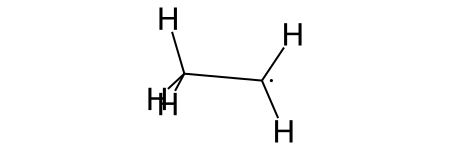

In [13]:
# 2. Add molecular coordinates to the `Mol` object.
from rdkit.Chem import rdDistGeom

mol = Chem.AddHs(mol)   # Add hydrogen atoms (missing in RDKit by default)
rdDistGeom.EmbedMolecule(mol)
mol

In [18]:
# 3. Determine the atom count, atomic symbols, coordinates, charge, and spin from the `Mol` object.
from rdkit.Chem import Descriptors
import numpy

natms = mol.GetNumAtoms()
syms = [a.GetSymbol() for a in mol.GetAtoms()]
conf = mol.GetConformer()
xyzs = numpy.array([conf.GetAtomPosition(i) for i in range(natms)])
char = Chem.GetFormalCharge(mol)
spin = Descriptors.NumRadicalElectrons(mol)

print("Atom count:", natms)
print("Symbols:", syms)
print("Coordinates (in Angstrom):", xyzs)
print("Charge:", char)
print("Spin:", spin)

Atom count: 7
Symbols: ['C', 'C', 'H', 'H', 'H', 'H', 'H']
Coordinates (in Angstrom): [[-0.61401452  0.06990281  0.00898599]
 [ 0.86222693 -0.06111826  0.25365479]
 [-0.92102836  1.11692806 -0.10552147]
 [-0.92545143 -0.50751126 -0.87772367]
 [-1.13092518 -0.41015913  0.87886023]
 [ 1.27886906 -1.02669932 -0.07203431]
 [ 1.45032349  0.8186571  -0.08622156]]
Charge: 0
Spin: 1


To better view the 3D structure, we can display it using 3Dmol.

In [8]:
import py3Dmol

viewer = py3Dmol.view(width=600, height=450)
viewer.addModel(Chem.MolToXYZBlock(mol), "xyz")
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.3}})
viewer.zoomTo()
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Finally, for our purposes the RDKit molecule object is often rather cumbersome to work with